# Detect Outliers Using KNN

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

In [2]:
# (OPTIONAL): You can also get this dataset by removing comments below

# from sklearn.datasets import load_breast_cancer
# cancer = load_breast_cancer()

# # Convert to DataFrame with correct column names
# df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

# # Add target column (not used initially for outlier detection)
# df["target"] = cancer.target


In [3]:
# Display few rows
df = pd.read_csv("data_breast_cancer.csv")

print(df.sample(10))

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
7          13.71         20.83           90.20      577.9          0.11890   
295        13.77         13.27           88.06      582.7          0.09198   
387        13.88         16.16           88.37      596.6          0.07026   
366        20.20         26.83          133.70     1234.0          0.09905   
405        10.94         18.59           70.39      370.0          0.10040   
320        10.25         16.18           66.52      324.2          0.10610   
350        11.66         17.07           73.70      421.0          0.07561   
113        10.51         20.19           68.64      334.2          0.11220   
202        23.29         26.67          158.90     1685.0          0.11410   
100        13.61         24.98           88.05      582.7          0.09488   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
7             0.16450        0.093660             0.059850      

In [4]:
# Check dataset shape

print("Dataset shape:", df.shape)

Dataset shape: (569, 31)


# Separate features and target

In [5]:
X = df.drop(columns=["target"])
y = df["target"]

# Feature Scaling (VERY IMPORTANT for KNN)

In [6]:
scaler = StandardScaler()

scaler.fit(X)
X_scaled = scaler.transform(X)
# X_scaled = scaler.fit_transform(X)

In [7]:
print(X_scaled[:2])

[[ 1.09706398e+00 -2.07333501e+00  1.26993369e+00  9.84374905e-01
   1.56846633e+00  3.28351467e+00  2.65287398e+00  2.53247522e+00
   2.21751501e+00  2.25574689e+00  2.48973393e+00 -5.65265059e-01
   2.83303087e+00  2.48757756e+00 -2.14001647e-01  1.31686157e+00
   7.24026158e-01  6.60819941e-01  1.14875667e+00  9.07083081e-01
   1.88668963e+00 -1.35929347e+00  2.30360062e+00  2.00123749e+00
   1.30768627e+00  2.61666502e+00  2.10952635e+00  2.29607613e+00
   2.75062224e+00  1.93701461e+00]
 [ 1.82982061e+00 -3.53632408e-01  1.68595471e+00  1.90870825e+00
  -8.26962447e-01 -4.87071673e-01 -2.38458552e-02  5.48144156e-01
   1.39236330e-03 -8.68652457e-01  4.99254601e-01 -8.76243603e-01
   2.63326966e-01  7.42401948e-01 -6.05350847e-01 -6.92926270e-01
  -4.40780058e-01  2.60162067e-01 -8.05450380e-01 -9.94437403e-02
   1.80592744e+00 -3.69203222e-01  1.53512599e+00  1.89048899e+00
  -3.75611957e-01 -4.30444219e-01 -1.46748968e-01  1.08708430e+00
  -2.43889668e-01  2.81189987e-01]]


#  Apply KNN for Outlier Detection

Idea:
- For each point, compute distance to its k-th nearest neighbor
- Points with very large distances are potential outliers


In [8]:
k = 5

knn = NearestNeighbors(n_neighbors=k)
knn.fit(X_scaled)

# Compute distances to k nearest neighbors
distances, indices = knn.kneighbors(X_scaled) # indices not used here

In [27]:
print(len(distances))

569


In [10]:
print(distances)

# Each row corresponds to one data point
# Each column is distance to:
# 1st nearest neighbor
# 2nd nearest neighbor
# 3rd nearest neighbor
# ...

# k-th nearest neighbor

# • 0.0 appears first because:

# Every point is its own nearest neighbor

[[0.00000000e+00 4.82994961e+00 4.91106276e+00 5.96350191e+00
  6.07294678e+00]
 [0.00000000e+00 2.28705131e+00 2.53602792e+00 2.71300928e+00
  2.75167814e+00]
 [0.00000000e+00 2.45154124e+00 2.67626057e+00 2.84346898e+00
  2.93029315e+00]
 ...
 [0.00000000e+00 2.55988376e+00 3.00376439e+00 3.07337478e+00
  3.07590151e+00]
 [1.68587394e-07 3.49995904e+00 4.81652818e+00 5.21862889e+00
  5.56452829e+00]
 [0.00000000e+00 2.80329045e+00 3.55623735e+00 3.66410316e+00
  3.68121190e+00]]


In [11]:
# Distance to the k=5th nearest neighbor. This would be the last column
k_distance = distances[:, -1]

print(k_distance)

[ 6.07294678  2.75167814  2.93029315  8.47950002  3.65190909  2.83739132
  1.81632971  3.09665683  2.85176446  6.81771512  2.15711463  2.77396199
  7.51987783  3.06248192  3.90359365  3.26032704  2.17799649  2.79552605
  2.79580125  2.04761118  2.12743649  2.34801125  4.80075998  3.08172808
  3.31107303  5.12249256  3.07272706  2.94225658  3.24959139  2.71672302
  2.98042237  3.4821196   3.05538293  3.25783156  2.79256265  3.20441451
  2.33078477  2.95877238  5.50539649  2.70241619  1.88938871  3.3300571
  6.76648307  2.09291721  2.16373611  3.25685628  2.26044388  2.4699117
  1.88441112  1.83515642  1.97896282  1.65739079  1.77339486  3.2004063
  2.11559561  2.12803232  2.54530709  2.40983202  1.97875705  2.85019922
  3.89651752  3.00737778  3.78749397  4.06152729  2.55476713  2.49188029
  2.63246531  2.04135251  9.0722654   1.8307621   2.77379509  6.98670554
  3.79356505  2.2461978   1.24846025  3.32182773  3.8859902   4.24059289
  8.71012475  1.41272389  2.42768773  2.54066251  4.74

In [12]:
# Add distance to DataFrame

df["knn_distance"] = k_distance

print(df.sample(10))

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
525        8.571         13.10           54.53      221.3          0.10360   
236       23.210         26.97          153.50     1670.0          0.09509   
558       14.590         22.68           96.39      657.1          0.08473   
87        19.020         24.59          122.00     1076.0          0.09029   
425       10.030         21.28           63.19      307.3          0.08117   
124       13.370         16.39           86.10      553.5          0.07115   
379       11.080         18.83           73.30      361.6          0.12160   
481       13.900         19.24           88.73      602.9          0.07991   
473       12.270         29.97           77.42      465.4          0.07699   
116        8.950         15.76           58.74      245.2          0.09462   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
525           0.07632         0.02565             0.015100      

# Choose Threshold for Outliers

In [13]:
# Using 95th percentile as threshold

threshold = np.percentile(k_distance, 95)

print("Outlier threshold:", threshold)

Outlier threshold: 5.37435156858179


In [14]:
# Flag outliers
df["is_outlier"] = df["knn_distance"] > threshold

print(df.sample(10))

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
356        13.05         18.59           85.09      512.0          0.10820   
473        12.27         29.97           77.42      465.4          0.07699   
530        11.75         17.56           75.89      422.9          0.10730   
475        12.83         15.73           82.89      506.9          0.09040   
494        13.16         20.54           84.06      538.7          0.07335   
405        10.94         18.59           70.39      370.0          0.10040   
147        14.95         18.77           97.84      689.5          0.08138   
2          19.69         21.25          130.00     1203.0          0.10960   
280        19.16         26.60          126.20     1138.0          0.10200   
158        12.06         12.74           76.84      448.6          0.09311   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
356           0.13040         0.09603              0.05603      

In [15]:
# Count outliers

print("Number of outliers detected:", df["is_outlier"].sum())

Number of outliers detected: 29


In [16]:
# Inspect Outliers

outliers = df[df["is_outlier"] == True]
print(outliers.head())

    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         17.99         10.38          122.80     1001.0          0.11840   
3         11.42         20.38           77.58      386.1          0.14250   
9         12.46         24.04           83.97      475.9          0.11860   
12        19.17         24.80          132.40     1123.0          0.09740   
38        14.99         25.20           95.54      698.8          0.09387   

    mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.27760         0.30010              0.14710         0.2419   
3            0.28390         0.24140              0.10520         0.2597   
9            0.23960         0.22730              0.08543         0.2030   
12           0.24580         0.20650              0.11180         0.2397   
38           0.05131         0.02398              0.02899         0.1565   

    mean fractal dimension  ...  worst area  worst smoothness  \
0              

# Visualization (Distance Plot)

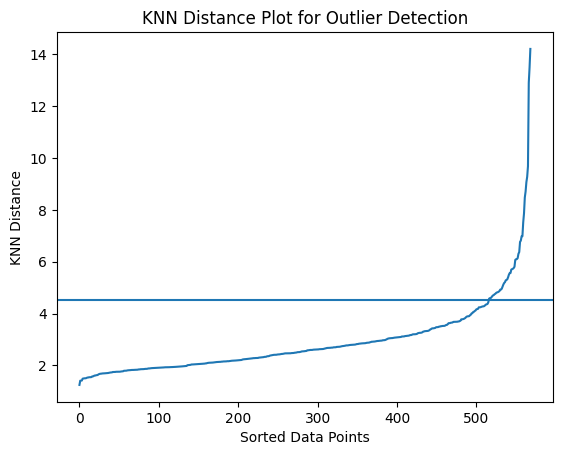

In [29]:
plt.figure()
plt.plot(sorted(k_distance))

plt.axhline(y=threshold)
plt.xlabel("Sorted Data Points")
plt.ylabel("KNN Distance")
plt.title("KNN Distance Plot for Outlier Detection")
plt.show()

# STOP

# OPTIONAL

# Now we use average distance

In [18]:
# 1) 
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=["target"])
y = df["target"]

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [19]:
# 2)
from sklearn.neighbors import NearestNeighbors
import numpy as np

k = 5  # number of neighbors

nbrs = NearestNeighbors(n_neighbors=k)
nbrs.fit(X_scaled)

# distances: shape (n_samples, k)
distances, indices = nbrs.kneighbors(X_scaled)

In [20]:
# 3) “How far this point is from its neighbors on average”

avg_distance = distances.mean(axis=1)

In [21]:
# 4) 
threshold = np.percentile(avg_distance, 95)
print("threshold:", threshold)

outliers_mask = avg_distance > threshold
print(outliers_mask)

threshold: 4.524534160395094
[ True False False  True False False False False False  True False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False  True
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False  True False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False  True False False False False False
 False False  True False False False False  True  True False False False
 False False False Fal

In [22]:
# 5)
X_out = X.copy()

X_out["avg_knn_distance"] = avg_distance

X_out["is_outlier"] = outliers_mask

In [23]:
print(X_out)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [24]:
outliers_df = X_out[X_out["is_outlier"] == True]

print(len(outliers_df))
print(outliers_df)

29
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         17.990         10.38          122.80     1001.0          0.11840   
3         11.420         20.38           77.58      386.1          0.14250   
9         12.460         24.04           83.97      475.9          0.11860   
12        19.170         24.80          132.40     1123.0          0.09740   
38        14.990         25.20           95.54      698.8          0.09387   
42        19.070         24.81          128.30     1104.0          0.09081   
68         9.029         17.33           58.79      250.5          0.10660   
71         8.888         14.64           58.79      244.0          0.09783   
78        20.180         23.97          143.70     1245.0          0.12860   
108       22.270         19.67          152.80     1509.0          0.13260   
112       14.260         19.65           97.83      629.9          0.07837   
122       24.250         20.20          166.20     1761.0    

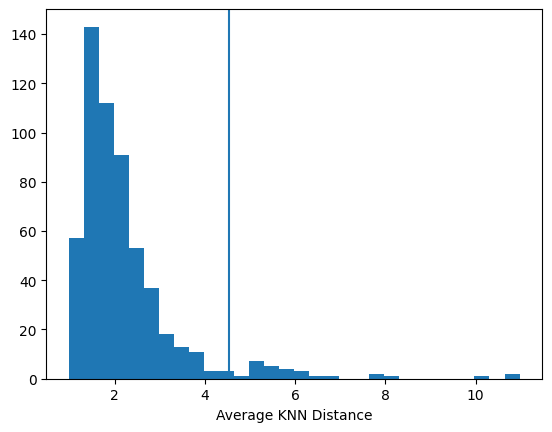

In [25]:
import matplotlib.pyplot as plt

plt.hist(avg_distance, bins=30)
plt.axvline(threshold)
plt.xlabel("Average KNN Distance")
plt.show()


# OPTIONAL (ADVANCED)

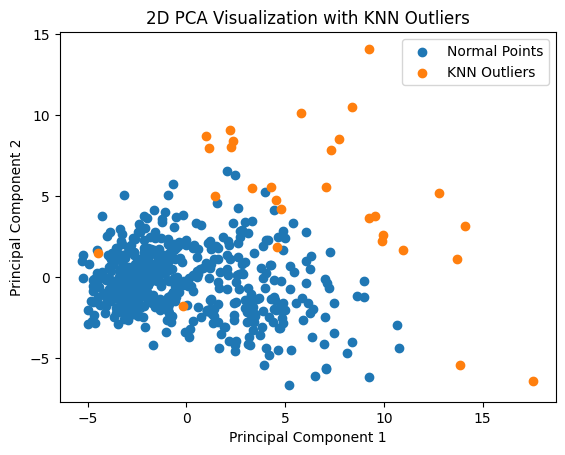

In [26]:

from sklearn.decomposition import PCA

# Reduce to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create PCA DataFrame
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["is_outlier_knn"] = df["is_outlier"]

# Plot PCA with outliers highlighted
plt.figure()
plt.scatter(
    pca_df.loc[~pca_df["is_outlier_knn"], "PC1"],
    pca_df.loc[~pca_df["is_outlier_knn"], "PC2"],
    label="Normal Points"
)

plt.scatter(
    pca_df.loc[pca_df["is_outlier_knn"], "PC1"],
    pca_df.loc[pca_df["is_outlier_knn"], "PC2"],
    label="KNN Outliers"
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Visualization with KNN Outliers")
plt.legend()
plt.show()
